In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv('Dataset_Amazon.csv')

In [2]:
data[data['review_body'].isna()]

,marketplace,customer_id,review_id,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,product_rating,seller_rating,shipping_rating


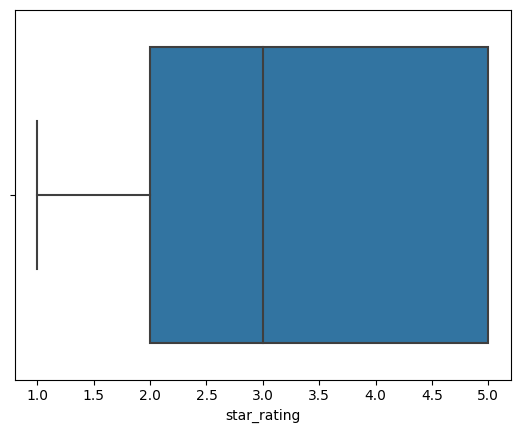

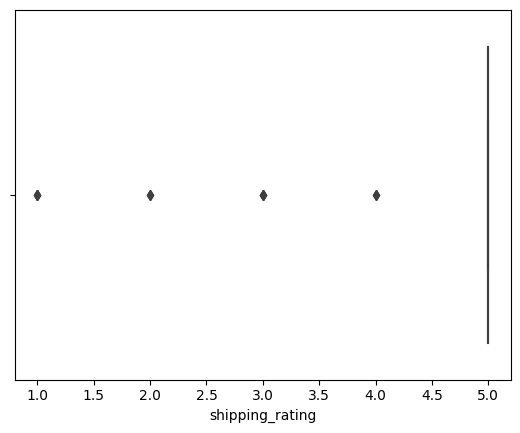

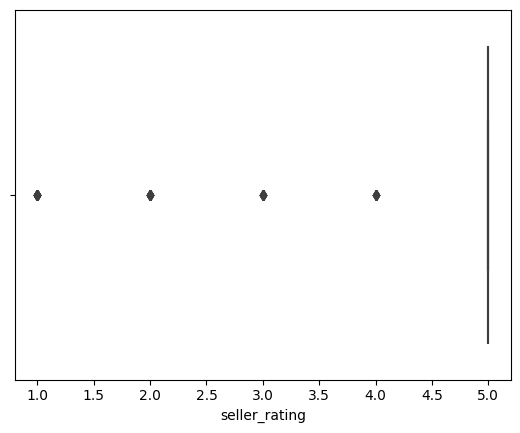

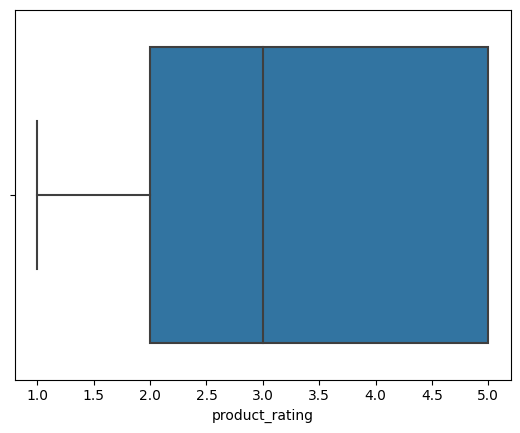

<ipython-input-3-1582787a39e0>:21: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each variable to identify outliers
sns.boxplot(x=data['star_rating'])
plt.show()

sns.boxplot(x=data['shipping_rating'])
plt.show()

sns.boxplot(x=data['seller_rating'])
plt.show()

sns.boxplot(x=data['product_rating'])
plt.show()

# Identify outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Remove outliers
#data = data[~outliers.any(axis=1)]

In [4]:
import pandas as pd
import numpy as np

# Calculate the mean, median, mode, standard deviation, and range for each variable
print('Mean:', data['star_rating'].mean())
print('Median:', data['star_rating'].median())
print('Mode:', data['star_rating'].mode().values[0])
print('Standard Deviation:', data['star_rating'].std())
print('Range:', data['star_rating'].max() - data['star_rating'].min())
freq_dist = data["star_rating"].value_counts()
corr_coef = np.corrcoef(data["star_rating"], data["seller_rating"])
print('freq dist:', freq_dist)
print('corr coef:', corr_coef)
print('-----------------------')


Mean: 3.278044871794872
Median: 3.0
Mode: 5
Standard Deviation: 1.4312690936767194
Range: 4
freq dist: 5    337
4    278
3    238
1    210
2    185
Name: star_rating, dtype: int64
corr coef: [[1.         0.22668806]
 [0.22668806 1.        ]]
-----------------------


In [5]:
print('Mean:', data['shipping_rating'].mean())
print('Median:', data['shipping_rating'].median())
print('Mode:', data['shipping_rating'].mode().values[0])
print('Standard Deviation:', data['shipping_rating'].std())
print('Range:', data['shipping_rating'].max() - data['shipping_rating'].min())
freq_dist = data["shipping_rating"].value_counts()
corr_coef = np.corrcoef(data["shipping_rating"], data["seller_rating"])
print('freq dist:', freq_dist)
print('corr coef:', corr_coef)
print('-----------------------')

Mean: 4.979166666666667
Median: 5.0
Mode: 5
Standard Deviation: 0.25242740281420784
Range: 4
freq dist: 5    1238
3       3
1       3
4       2
2       2
Name: shipping_rating, dtype: int64
corr coef: [[1.         0.14458485]
 [0.14458485 1.        ]]
-----------------------


In [6]:
print('Mean:', data['seller_rating'].mean())
print('Median:', data['seller_rating'].median())
print('Mode:', data['seller_rating'].mode().values[0])
print('Standard Deviation:', data['seller_rating'].std())
print('Range:', data['seller_rating'].max() - data['seller_rating'].min())
freq_dist = data["seller_rating"].value_counts()
corr_coef = np.corrcoef(data["seller_rating"], data["seller_rating"])
print('freq dist:', freq_dist)
print('corr coef:', corr_coef)
print('-----------------------')

Mean: 4.866185897435898
Median: 5.0
Mode: 5
Standard Deviation: 0.6486387231433399
Range: 4
freq dist: 5    1190
1      22
2      15
3      13
4       8
Name: seller_rating, dtype: int64
corr coef: [[1. 1.]
 [1. 1.]]
-----------------------


In [7]:
print('Mean:', data['product_rating'].mean())
print('Median:', data['product_rating'].median())
print('Mode:', data['product_rating'].mode().values[0])
print('Standard Deviation:', data['product_rating'].std())
print('Range:', data['product_rating'].max() - data['product_rating'].min())
freq_dist = data["product_rating"].value_counts()
corr_coef = np.corrcoef(data["product_rating"], data["seller_rating"])
print('freq dist:', freq_dist)
print('corr coef:', corr_coef)
print('-----------------------')

Mean: 3.278044871794872
Median: 3.0
Mode: 5
Standard Deviation: 1.4284649006270052
Range: 4
freq dist: 5    335
4    280
3    239
1    209
2    185
Name: product_rating, dtype: int64
corr coef: [[1.         0.22713307]
 [0.22713307 1.        ]]
-----------------------


<Axes: >

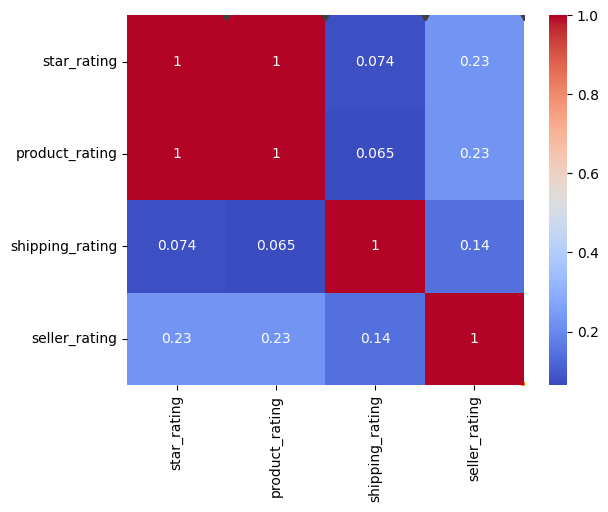

In [8]:
import seaborn as sns

data = data[['star_rating', 'review_body', 'product_rating', 'shipping_rating', 'seller_rating']]

# Create a histogram of review ratings
sns.histplot(data=data, x="star_rating", kde=True)

# Create a box plot of shipment ratings
sns.boxplot(data=data, x="shipping_rating")

# Create a scatter plot of review rating vs. product rating
sns.scatterplot(data=data, x="star_rating", y="product_rating")

# Create a heatmap of the correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")


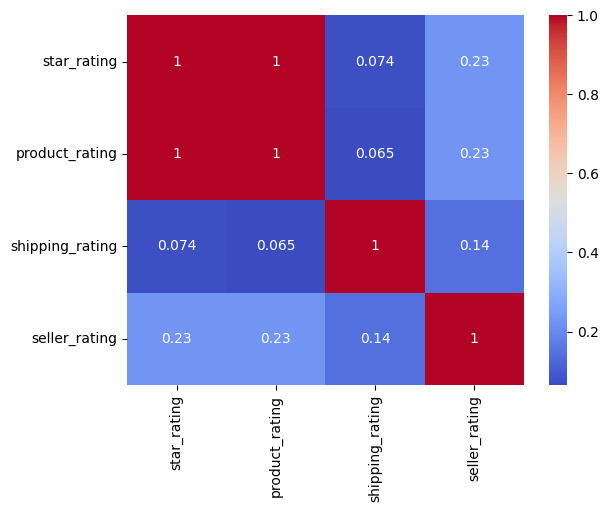

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix using Pearson's correlation coefficient
corr_matrix = data.corr(method='pearson')

# Plot the correlation matrix as a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


QQ Plot for shipping_rating


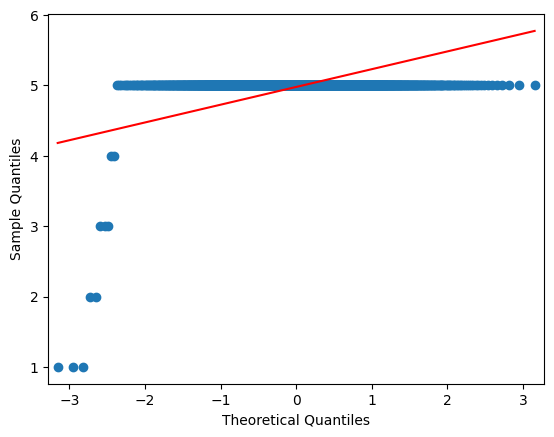

QQ Plot for product_rating


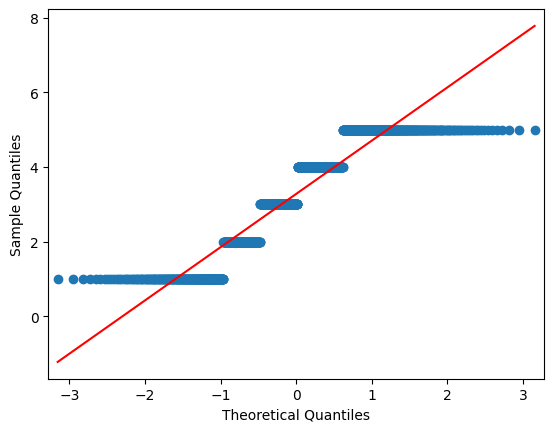

QQ Plot for seller_rating


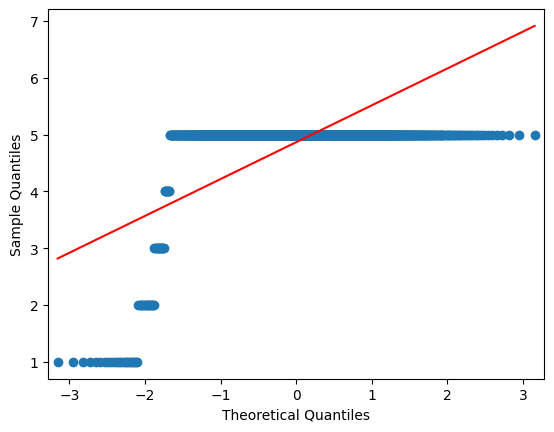

QQ Plot for star_rating


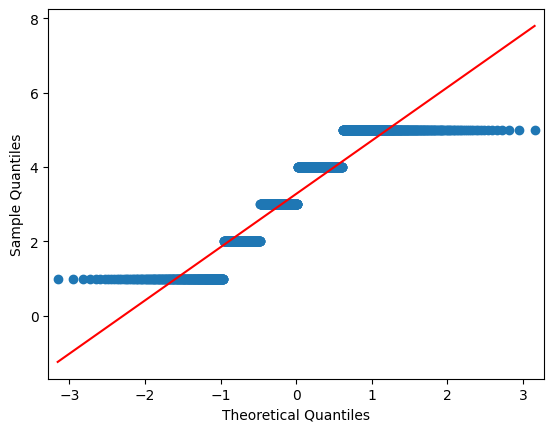

In [10]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats

# Check normality assumption
for col in [ "shipping_rating", "product_rating", "seller_rating", "star_rating"]:
    print(f"QQ Plot for {col}")
    sm.qqplot(data[col], line='s')
    plt.show()

Scatter plot for shipping_rating vs star_rating


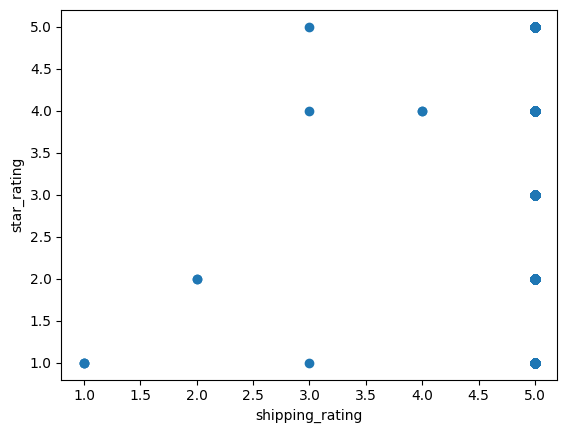

Scatter plot for product_rating vs star_rating


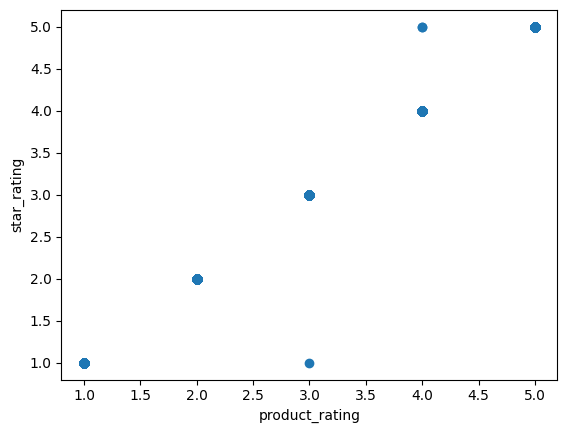

Scatter plot for seller_rating vs star_rating


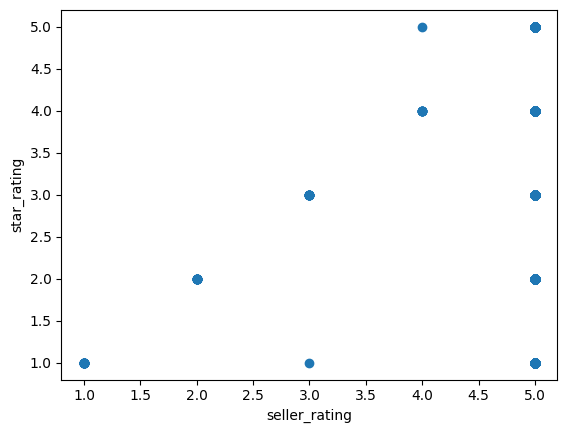

                            OLS Regression Results                            
Dep. Variable:            star_rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.338e+25
Date:                Thu, 30 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:35:18   Log-Likelihood:                 36849.
No. Observations:                1248   AIC:                        -7.130e+04
Df Residuals:                      49   BIC:                        -6.515e+04
Df Model:                        1198                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

In [11]:
    
# Check linearity and homoscedasticity assumptions
for col in ["shipping_rating", "product_rating", "seller_rating"]:
    print(f"Scatter plot for {col} vs star_rating")
    plt.scatter(data[col], data["star_rating"])
    plt.xlabel(col)
    plt.ylabel("star_rating")
    plt.show()

# Fit linear regression model
model = sm.formula.ols(formula="star_rating ~ review_body + shipping_rating + product_rating + seller_rating", data=data).fit()

# Check the model summary
print(model.summary())


In [12]:
data_new = pd.read_csv('Cases.csv')

Method : CountVectorizer

Gradient Boosting Classifier

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(data['review_body'])
X_new = vectorizer.transform(data_new['review_body'])

# train a separate Gradient Boosting Regressor for each rating
review_model_G = GradientBoostingClassifier()
review_model_G.fit(X, data['star_rating'])
review_predictions_G = review_model_G.predict(X)
review_accuracy_G = r2_score(data['star_rating'], review_predictions_G)

shipment_model_G = GradientBoostingClassifier()
shipment_model_G.fit(X, data['shipping_rating'])
shipment_predictions_G = shipment_model_G.predict(X)
shipment_accuracy_G = r2_score(data['shipping_rating'], shipment_predictions_G)

seller_model_G = GradientBoostingClassifier()
seller_model_G.fit(X, data['seller_rating'])
seller_predictions_G = seller_model_G.predict(X)
seller_accuracy_G = r2_score(data['seller_rating'], seller_predictions_G)

product_model_G = GradientBoostingClassifier()
product_model_G.fit(X, data['product_rating'])
product_predictions_G = product_model_G.predict(X)
product_accuracy_G = r2_score(data['product_rating'], product_predictions_G)


# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_G))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_G))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_G))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_G))

predictions_1_G = review_model_G.predict(X_new)
predictions_2_G = shipment_model_G.predict(X_new)
predictions_3_G = seller_model_G.predict(X_new)
predictions_4_G = product_model_G.predict(X_new)

print(predictions_1_G,predictions_2_G,predictions_3_G,predictions_4_G)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_G))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_G))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_G))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_G))

Review Rating Accuracy: 0.69
Shipment Rating Accuracy: 1.00
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.69
[5 4 3] [5 5 5] [5 5 5] [5 4 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.89      0.88       210
           2       0.97      0.70      0.81       185
           3       0.88      0.74      0.80       238
           4       0.74      0.82      0.78       278
           5       0.74      0.86      0.80       337

    accuracy                           0.81      1248
   macro avg       0.84      0.80      0.81      1248
weighted avg       0.82      0.81      0.81      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

Random Forest Classifier

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(data['review_body'])
X_new = vectorizer.transform(data_new['review_body'])

# train a separate Gradient Boosting Regressor for each rating
review_model_RF = RandomForestClassifier()
review_model_RF.fit(X, data['star_rating'])
review_predictions_RF = review_model_RF.predict(X)
review_accuracy_RF = r2_score(data['star_rating'], review_predictions_RF)

shipment_model_RF = RandomForestClassifier()
shipment_model_RF.fit(X, data['shipping_rating'])
shipment_predictions_RF = shipment_model_RF.predict(X)
shipment_accuracy_RF = r2_score(data['shipping_rating'], shipment_predictions_RF)

seller_model_RF = RandomForestClassifier()
seller_model_RF.fit(X, data['seller_rating'])
seller_predictions_RF = seller_model_RF.predict(X)
seller_accuracy_RF = r2_score(data['seller_rating'], seller_predictions_RF)

product_model_RF = RandomForestClassifier()
product_model_RF.fit(X, data['product_rating'])
product_predictions_RF = product_model_RF.predict(X)
product_accuracy_RF = r2_score(data['product_rating'], product_predictions_RF)


# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_RF))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_RF))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_RF))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_RF))

predictions_1_RF = review_model_RF.predict(X_new)
predictions_2_RF = shipment_model_RF.predict(X_new)
predictions_3_RF = seller_model_RF.predict(X_new)
predictions_4_RF = product_model_RF.predict(X_new)

print(predictions_1_RF,predictions_2_RF,predictions_3_RF,predictions_4_RF)


print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_RF))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_RF))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_RF))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_RF))

Review Rating Accuracy: 0.97
Shipment Rating Accuracy: 0.89
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.97
[5 3 3] [5 5 5] [5 5 5] [5 3 3]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       0.99      0.98      0.99       185
           3       1.00      0.97      0.98       238
           4       0.96      0.96      0.96       278
           5       0.95      0.97      0.96       337

    accuracy                           0.97      1248
   macro avg       0.98      0.98      0.98      1248
weighted avg       0.97      0.97      0.97      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

Decision Tree Classifier

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(data['review_body'])
X_new = vectorizer.transform(data_new['review_body'])

# train a separate Gradient Boosting Regressor for each rating
review_model_DT = DecisionTreeClassifier()
review_model_DT.fit(X, data['star_rating'])
review_predictions_DT = review_model_DT.predict(X)
review_accuracy_DT = r2_score(data['star_rating'], review_predictions_DT)

shipment_model_DT = DecisionTreeClassifier()
shipment_model_DT.fit(X, data['shipping_rating'])
shipment_predictions_DT = shipment_model_DT.predict(X)
shipment_accuracy_DT = r2_score(data['shipping_rating'], shipment_predictions_DT)

seller_model_DT = DecisionTreeClassifier()
seller_model_DT.fit(X, data['seller_rating'])
seller_predictions_DT = seller_model_DT.predict(X)
seller_accuracy_DT = r2_score(data['seller_rating'], seller_predictions_DT)

product_model_DT = DecisionTreeClassifier()
product_model_DT.fit(X, data['product_rating'])
product_predictions_DT= product_model_DT.predict(X)
product_accuracy_DT = r2_score(data['product_rating'], product_predictions_DT)


# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_DT))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_DT))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_DT))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_DT))

predictions_1_DT = review_model_DT.predict(X_new)
predictions_2_DT = shipment_model_DT.predict(X_new)
predictions_3_DT = seller_model_DT.predict(X_new)
predictions_4_DT = product_model_DT.predict(X_new)

print(predictions_1_DT,predictions_2_DT,predictions_3_DT,predictions_4_DT)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_DT))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_DT))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_DT))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_DT))

Review Rating Accuracy: 0.97
Shipment Rating Accuracy: 1.00
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.97
[5 4 3] [5 5 5] [5 5 5] [5 4 3]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       0.99      0.98      0.99       185
           3       0.99      0.97      0.98       238
           4       0.96      0.96      0.96       278
           5       0.95      0.96      0.96       337

    accuracy                           0.97      1248
   macro avg       0.98      0.98      0.98      1248
weighted avg       0.97      0.97      0.97      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

Method : Tfidf Vectorizer

Gradient Boosting Classifier

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['review_body'])
X_new = vectorizer.transform(data_new['review_body'])

# train a separate Gradient Boosting Regressor for each rating
review_model_G = GradientBoostingClassifier()
review_model_G.fit(X, data['star_rating'])
review_predictions_G = review_model_G.predict(X)
review_accuracy_G = r2_score(data['star_rating'], review_predictions_G)

shipment_model_G = GradientBoostingClassifier()
shipment_model_G.fit(X, data['shipping_rating'])
shipment_predictions_G = shipment_model_G.predict(X)
shipment_accuracy_G = r2_score(data['shipping_rating'], shipment_predictions_G)

seller_model_G = GradientBoostingClassifier()
seller_model_G.fit(X, data['seller_rating'])
seller_predictions_G = seller_model_G.predict(X)
seller_accuracy_G = r2_score(data['seller_rating'], seller_predictions_G)

product_model_G = GradientBoostingClassifier()
product_model_G.fit(X, data['product_rating'])
product_predictions_G = product_model_G.predict(X)
product_accuracy_G = r2_score(data['product_rating'], product_predictions_G)


# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_G))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_G))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_G))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_G))

predictions_1_G = review_model_G.predict(X_new)
predictions_2_G = shipment_model_G.predict(X_new)
predictions_3_G = seller_model_G.predict(X_new)
predictions_4_G = product_model_G.predict(X_new)

print(predictions_1_G,predictions_2_G,predictions_3_G,predictions_4_G)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_G))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_G))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_G))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_G))

Review Rating Accuracy: 0.90
Shipment Rating Accuracy: 1.00
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.90
[5 3 5] [5 5 5] [5 5 5] [5 3 5]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.97      0.97       210
           2       0.98      0.89      0.93       185
           3       0.94      0.91      0.93       238
           4       0.86      0.89      0.88       278
           5       0.89      0.93      0.91       337

    accuracy                           0.92      1248
   macro avg       0.93      0.92      0.92      1248
weighted avg       0.92      0.92      0.92      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

Random Forest Classifier

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['review_body'])
X_new = vectorizer.transform(data_new['review_body'])

# train a separate Gradient Boosting Regressor for each rating
review_model_RF = RandomForestClassifier()
review_model_RF.fit(X, data['star_rating'])
review_predictions_RF = review_model_RF.predict(X)
review_accuracy_RF = r2_score(data['star_rating'], review_predictions_RF)

shipment_model_RF = RandomForestClassifier()
shipment_model_RF.fit(X, data['shipping_rating'])
shipment_predictions_RF = shipment_model_RF.predict(X)
shipment_accuracy_RF = r2_score(data['shipping_rating'], shipment_predictions_RF)

seller_model_RF = RandomForestClassifier()
seller_model_RF.fit(X, data['seller_rating'])
seller_predictions_RF = seller_model_RF.predict(X)
seller_accuracy_RF = r2_score(data['seller_rating'], seller_predictions_RF)

product_model_RF = RandomForestClassifier()
product_model_RF.fit(X, data['product_rating'])
product_predictions_RF = product_model_RF.predict(X)
product_accuracy_RF = r2_score(data['product_rating'], product_predictions_RF)


# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_RF))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_RF))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_RF))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_RF))

predictions_1_RF = review_model_RF.predict(X_new)
predictions_2_RF = shipment_model_RF.predict(X_new)
predictions_3_RF = seller_model_RF.predict(X_new)
predictions_4_RF = product_model_RF.predict(X_new)

print(predictions_1_RF,predictions_2_RF,predictions_3_RF,predictions_4_RF)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_RF))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_RF))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_RF))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_RF))

Review Rating Accuracy: 0.99
Shipment Rating Accuracy: 1.00
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.99
[5 3 3] [5 5 5] [5 5 5] [5 3 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       0.99      0.99      0.99       185
           3       1.00      0.97      0.99       238
           4       0.93      0.99      0.96       278
           5       0.98      0.96      0.97       337

    accuracy                           0.98      1248
   macro avg       0.98      0.98      0.98      1248
weighted avg       0.98      0.98      0.98      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

Decision Tree Classifier

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['review_body'])
X_new = vectorizer.transform(data_new['review_body'])

# train a separate Gradient Boosting Regressor for each rating
review_model_DT = DecisionTreeClassifier()
review_model_DT.fit(X, data['star_rating'])
review_predictions_DT = review_model_DT.predict(X)
review_accuracy_DT = r2_score(data['star_rating'], review_predictions_DT)

shipment_model_DT = DecisionTreeClassifier()
shipment_model_DT.fit(X, data['shipping_rating'])
shipment_predictions_DT = shipment_model_DT.predict(X)
shipment_accuracy_DT = r2_score(data['shipping_rating'], shipment_predictions_DT)

seller_model_DT = DecisionTreeClassifier()
seller_model_DT.fit(X, data['seller_rating'])
seller_predictions_DT = seller_model_DT.predict(X)
seller_accuracy_DT = r2_score(data['seller_rating'], seller_predictions_DT)

product_model_DT = DecisionTreeClassifier()
product_model_DT.fit(X, data['product_rating'])
product_predictions_DT= product_model_DT.predict(X)
product_accuracy_DT = r2_score(data['product_rating'], product_predictions_DT)


# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_DT))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_DT))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_DT))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_DT))

predictions_1_DT = review_model_DT.predict(X_new)
predictions_2_DT = shipment_model_DT.predict(X_new)
predictions_3_DT = seller_model_DT.predict(X_new)
predictions_4_DT = product_model_DT.predict(X_new)

print(predictions_1_DT,predictions_2_DT,predictions_3_DT,predictions_4_DT)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_DT))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_DT))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_DT))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_DT))

Review Rating Accuracy: 0.99
Shipment Rating Accuracy: 1.00
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.99
[5 3 3] [5 5 5] [5 5 5] [5 3 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       1.00      0.98      0.99       185
           3       0.99      0.98      0.99       238
           4       0.93      0.99      0.96       278
           5       0.99      0.95      0.97       337

    accuracy                           0.98      1248
   macro avg       0.98      0.98      0.98      1248
weighted avg       0.98      0.98      0.98      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

Method : Word2Vec

In [25]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


GradientBoostingClassifier

In [27]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train word2vec model on review text
sentences = [review.split() for review in data['review_body']]
w2v_model = Word2Vec(sentences, vector_size=100, min_count=1, workers=4)

# Convert review text to word embeddings
X = []
for review in sentences:
    review_vec = []
    for word in review:
        try:
            word_vec = w2v_model.wv[word]
            review_vec.append(word_vec)
        except KeyError:
            pass
    X.append(sum(review_vec) / len(review_vec))

X_new = []
for review in data_new['review_body']:
    review_vec = []
    for word in review.split():
        try:
            word_vec = w2v_model.wv[word]
            review_vec.append(word_vec)
        except KeyError:
            pass
    if review_vec:
        X_new.append(sum(review_vec) / len(review_vec))
    else:
        X_new.append(np.zeros(w2v_model.vector_size))


# Train GradientBoostingClassifier models to predict review ratings, product ratings, seller ratings, and shipping ratings
review_model_GBC = GradientBoostingClassifier()
review_model_GBC.fit(X, data['star_rating'])
review_predictions_GBC = review_model_GBC.predict(X)
review_accuracy_GBC = accuracy_score(data['star_rating'], review_predictions_GBC)

shipment_model_GBC = GradientBoostingClassifier()
shipment_model_GBC.fit(X, data['shipping_rating'])
shipment_predictions_GBC = shipment_model_GBC.predict(X)
shipment_accuracy_GBC = accuracy_score(data['shipping_rating'], shipment_predictions_GBC)

seller_model_GBC = GradientBoostingClassifier()
seller_model_GBC.fit(X, data['seller_rating'])
seller_predictions_GBC = seller_model_GBC.predict(X)
seller_accuracy_GBC = accuracy_score(data['seller_rating'], seller_predictions_GBC)

product_model_GBC = GradientBoostingClassifier()
product_model_GBC.fit(X, data['product_rating'])
product_predictions_GBC = product_model_GBC.predict(X)
product_accuracy_GBC = accuracy_score(data['product_rating'], product_predictions_GBC)

# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_GBC))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_GBC))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_GBC))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_GBC))

# Make predictions for new data
predictions_1_GBC = review_model_GBC.predict(X_new)
predictions_2_GBC = shipment_model_GBC.predict(X_new)
predictions_3_GBC = seller_model_GBC.predict(X_new)
predictions_4_GBC = product_model_GBC.predict(X_new)

print(predictions_1_GBC, predictions_2_GBC, predictions_3_GBC, predictions_4_GBC)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_GBC))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_GBC))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_GBC))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_GBC))

Review Rating Accuracy: 0.93
Shipment Rating Accuracy: 1.00
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.93
[5 2 1] [5 5 5] [5 5 5] [5 2 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.93      0.95       210
           2       0.98      0.91      0.94       185
           3       0.94      0.93      0.94       238
           4       0.93      0.91      0.92       278
           5       0.87      0.95      0.91       337

    accuracy                           0.93      1248
   macro avg       0.94      0.93      0.93      1248
weighted avg       0.93      0.93      0.93      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

RandomForestClassifier

In [28]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Perform text preprocessing
sentences = [review.split() for review in data['review_body']]
model = Word2Vec(sentences, min_count=1, vector_size=100)
X = []
for review in sentences:
    review_vector = np.zeros(100)
    n_words = 0
    for word in review:
        if word in model.wv.key_to_index:
            review_vector += model.wv.get_vector(word)
            n_words += 1
    if n_words != 0:
        review_vector /= n_words
    X.append(review_vector)
X = np.array(X)
y_review = data['star_rating']
y_shipment = data['shipping_rating']
y_seller = data['seller_rating']
y_product = data['product_rating']

# Use random forest to predict review ratings
review_model_RF = RandomForestClassifier()
review_model_RF.fit(X, y_review)
review_predictions_RF = review_model_RF.predict(X)
review_accuracy_RF = accuracy_score(y_review, review_predictions_RF)

# Use random forest to predict shipment ratings
shipment_model_RF = RandomForestClassifier()
shipment_model_RF.fit(X, y_shipment)
shipment_predictions_RF = shipment_model_RF.predict(X)
shipment_accuracy_RF = accuracy_score(y_shipment, shipment_predictions_RF)

# Use random forest to predict seller ratings
seller_model_RF = RandomForestClassifier()
seller_model_RF.fit(X, y_seller)
seller_predictions_RF = seller_model_RF.predict(X)
seller_accuracy_RF = accuracy_score(y_seller, seller_predictions_RF)

# Use random forest to predict product ratings
product_model_RF = RandomForestClassifier()
product_model_RF.fit(X, y_product)
product_predictions_RF = product_model_RF.predict(X)
product_accuracy_RF = accuracy_score(y_product, product_predictions_RF)

# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_RF))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_RF))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_RF))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_RF))

# Get predictions for new data
sentences_new = [review.split() for review in data_new['review_body']]
X_new = []
for review in sentences_new:
    review_vector = np.zeros(100)
    n_words = 0
    for word in review:
        if word in model.wv.key_to_index:
            review_vector += model.wv.get_vector(word)
            n_words += 1
    if n_words != 0:
        review_vector /= n_words
    X_new.append(review_vector)
X_new = np.array(X_new)

predictions_1_RF = review_model_RF.predict(X_new)
predictions_2_RF = shipment_model_RF.predict(X_new)
predictions_3_RF = seller_model_RF.predict(X_new)
predictions_4_RF = product_model_RF.predict(X_new)

print(predictions_1_RF, predictions_2_RF, predictions_3_RF, predictions_4_RF)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_RF))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_RF))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_RF))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_RF))

Review Rating Accuracy: 0.99
Shipment Rating Accuracy: 1.00
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.99
[5 3 1] [5 5 5] [5 5 5] [5 3 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       1.00      0.99      0.99       185
           3       1.00      0.98      0.99       238
           4       0.96      0.99      0.98       278
           5       0.99      0.98      0.98       337

    accuracy                           0.99      1248
   macro avg       0.99      0.99      0.99      1248
weighted avg       0.99      0.99      0.99      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

DecisionTreeClassifier

In [29]:
from gensim.models import Word2Vec
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train word2vec model
sentences = [review.split() for review in data['review_body']]
w2v_model = Word2Vec(sentences, vector_size=100, min_count=1, window=5, sg=1)

# Convert reviews to word embeddings
X = []
for review in sentences:
    review_vec = []
    for word in review:
        if word in w2v_model.wv.key_to_index:
            review_vec.append(w2v_model.wv[word])
    X.append(np.mean(review_vec, axis=0))
X = np.array(X)

# Train DecisionTreeClassifier model for review ratings
review_model_DT = DecisionTreeClassifier()
review_model_DT.fit(X, data['star_rating'])
review_predictions_DT = review_model_DT.predict(X)
review_accuracy_DT = accuracy_score(data['star_rating'], review_predictions_DT)

# Train DecisionTreeClassifier model for shipment ratings
shipment_model_DT = DecisionTreeClassifier()
shipment_model_DT.fit(X, data['shipping_rating'])
shipment_predictions_DT = shipment_model_DT.predict(X)
shipment_accuracy_DT = accuracy_score(data['shipping_rating'], shipment_predictions_DT)

# Train DecisionTreeClassifier model for seller ratings
seller_model_DT = DecisionTreeClassifier()
seller_model_DT.fit(X, data['seller_rating'])
seller_predictions_DT = seller_model_DT.predict(X)
seller_accuracy_DT = accuracy_score(data['seller_rating'], seller_predictions_DT)

# Train DecisionTreeClassifier model for product ratings
product_model_DT = DecisionTreeClassifier()
product_model_DT.fit(X, data['product_rating'])
product_predictions_DT = product_model_DT.predict(X)
product_accuracy_DT = accuracy_score(data['product_rating'], product_predictions_DT)

# Print accuracy metrics
print('Review Rating Accuracy: {:.2f}'.format(review_accuracy_DT))
print('Shipment Rating Accuracy: {:.2f}'.format(shipment_accuracy_DT))
print('Seller Rating Accuracy: {:.2f}'.format(seller_accuracy_DT))
print('Product Rating Accuracy: {:.2f}'.format(product_accuracy_DT))

# Convert new reviews to word embeddings
X_new = []
for review in data_new['review_body']:
    review_vec = []
    for word in review.split():
        if word in w2v_model.wv.key_to_index:
            review_vec.append(w2v_model.wv[word])
    if len(review_vec) > 0:
        X_new.append(np.mean(review_vec, axis=0))
    else:
        X_new.append(np.zeros(100))
X_new = np.array(X_new)

# Predict rating for new reviews
predictions_1_DT = review_model_DT.predict(X_new)
predictions_2_DT = shipment_model_DT.predict(X_new)
predictions_3_DT = seller_model_DT.predict(X_new)
predictions_4_DT = product_model_DT.predict(X_new)

print(predictions_1_DT, predictions_2_DT, predictions_3_DT, predictions_4_DT)


print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_DT))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_DT))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_DT))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_DT))


Review Rating Accuracy: 0.99
Shipment Rating Accuracy: 1.00
Seller Rating Accuracy: 1.00
Product Rating Accuracy: 0.99
[5 4 1] [5 5 5] [5 5 5] [5 3 2]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       1.00      0.99      0.99       185
           3       0.99      0.99      0.99       238
           4       0.95      1.00      0.98       278
           5       1.00      0.97      0.98       337

    accuracy                           0.99      1248
   macro avg       0.99      0.99      0.99      1248
weighted avg       0.99      0.99      0.99      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5 

Method: Glove

In [30]:
data_new = pd.read_csv('Cases.csv')
data_new

,marketplace,customer_id,review_id,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,product_rating,seller_rating,shipping_rating
0,US,37136096,RXOQG5BR9VFBB,B00EQ1XUHY,YouYouPifa Red+Yellow+Green+Blue LED Light Sta...,Watches,5,0,0,Five Stars,AWESOME,31/8/2015,5,5,5
1,US,49426214,R3FGW0OVI6PQRY,B00ICZ7CW4,Zulu G10 Nato Military Watch Strap 3 Ring PVD ...,Watches,2,2,3,No third ring and the band is super stiff. If ...,"It works, but its not a true NATO watch. No th...",28/8/2015,2,5,5
2,US,10058742,R1ONRXMBDIXE67,B0000C0SE2,926562415,Watches,2,0,0,"Good Band, But Broke After 5 Months",I ordered this band in July. I installed it w...,12/6/10,2,5,5


GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import gensim.downloader as api

# Load GloVe embeddings
glove_vectors = api.load('glove-wiki-gigaword-100')

# Tokenize review text and convert to embeddings
def tokenize_and_embed(text):
    tokens = text.lower().split()
    embeddings = []
    for token in tokens:
        if token in glove_vectors:
            embeddings.append(glove_vectors[token])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_vectors.vector_size)
    
# Tokenize and embed review text for training data
X = np.array([tokenize_and_embed(text) for text in data['review_body']])
y_review = data['star_rating'].values
y_shipment = data['shipping_rating'].values
y_seller = data['seller_rating'].values
y_product = data['product_rating'].values

# Train Gradient Boosting classifiers for each rating
review_model_G = GradientBoostingClassifier()
review_model_G.fit(X, y_review)
review_predictions_G = review_model_G.predict(X)
review_accuracy_G = accuracy_score(y_review, review_predictions_G)

shipment_model_G = GradientBoostingClassifier()
shipment_model_G.fit(X, y_shipment)
shipment_predictions_G = shipment_model_G.predict(X)
shipment_accuracy_G = accuracy_score(y_shipment, shipment_predictions_G)

seller_model_G = GradientBoostingClassifier()
seller_model_G.fit(X, y_seller)
seller_predictions_G = seller_model_G.predict(X)
seller_accuracy_G = accuracy_score(y_seller, seller_predictions_G)

product_model_G = GradientBoostingClassifier()
product_model_G.fit(X, y_product)
product_predictions_G = product_model_G.predict(X)
product_accuracy_G = accuracy_score(y_product, product_predictions_G)

# Print accuracy metrics
print('Review Rating Accuracy (GloVe): {:.2f}'.format(review_accuracy_G))
print('Shipment Rating Accuracy (GloVe): {:.2f}'.format(shipment_accuracy_G))
print('Seller Rating Accuracy (GloVe): {:.2f}'.format(seller_accuracy_G))
print('Product Rating Accuracy (GloVe): {:.2f}'.format(product_accuracy_G))

# Tokenize and embed review text for new data
X_new = np.array([tokenize_and_embed(text) for text in data_new['review_body']])

# Make predictions for new data
predictions_1_G = review_model_G.predict(X_new)
predictions_2_G = shipment_model_G.predict(X_new)
predictions_3_G = seller_model_G.predict(X_new)
predictions_4_G = product_model_G.predict(X_new)

print(predictions_1_G, predictions_2_G, predictions_3_G, predictions_4_G)


print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_G))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_G))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_G))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_G))

[==================================================] 100.0% 128.1/128.1MB downloaded
Review Rating Accuracy (GloVe): 0.97
Shipment Rating Accuracy (GloVe): 1.00
Seller Rating Accuracy (GloVe): 1.00
Product Rating Accuracy (GloVe): 0.97
[5 2 3] [5 5 5] [5 5 5] [5 4 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       210
           2       1.00      0.98      0.99       185
           3       0.99      0.97      0.98       238
           4       0.94      0.96      0.95       278
           5       0.96      0.97      0.96       337

    accuracy                           0.97      1248
   macro avg       0.98      0.97      0.98      1248
weighted avg       0.97      0.97      0.97      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
    

RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import gensim.downloader as api

# Load GloVe embeddings
glove_vectors = api.load('glove-wiki-gigaword-100')

# Tokenize review text and convert to embeddings
def tokenize_and_embed(text):
    tokens = text.lower().split()
    embeddings = []
    for token in tokens:
        if token in glove_vectors:
            embeddings.append(glove_vectors[token])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_vectors.vector_size)

# Tokenize and embed review text for training data
X = np.array([tokenize_and_embed(text) for text in data['review_body']])
y_review = data['star_rating'].values
y_shipment = data['shipping_rating'].values
y_seller = data['seller_rating'].values
y_product = data['product_rating'].values

# Train RandomForestClassifier models for each rating
review_model_R = RandomForestClassifier(n_estimators=100, random_state=42)
review_model_R.fit(X, y_review)
review_predictions_R = review_model_R.predict(X)
review_accuracy_R = accuracy_score(y_review, review_predictions_R)

shipment_model_R = RandomForestClassifier(n_estimators=100, random_state=42)
shipment_model_R.fit(X, y_shipment)
shipment_predictions_R = shipment_model_R.predict(X)
shipment_accuracy_R = accuracy_score(y_shipment, shipment_predictions_R)

seller_model_R = RandomForestClassifier(n_estimators=100, random_state=42)
seller_model_R.fit(X, y_seller)
seller_predictions_R = seller_model_R.predict(X)
seller_accuracy_R = accuracy_score(y_seller, seller_predictions_R)

product_model_R = RandomForestClassifier(n_estimators=100, random_state=42)
product_model_R.fit(X, y_product)
product_predictions_R = product_model_R.predict(X)
product_accuracy_R = accuracy_score(y_product, product_predictions_R)

# Print accuracy metrics
print('Review Rating Accuracy (GloVe): {:.2f}'.format(review_accuracy_R))
print('Shipment Rating Accuracy (GloVe): {:.2f}'.format(shipment_accuracy_R))
print('Seller Rating Accuracy (GloVe): {:.2f}'.format(seller_accuracy_R))
print('Product Rating Accuracy (GloVe): {:.2f}'.format(product_accuracy_R))

# Tokenize and embed review text for new data
X_new = np.array([tokenize_and_embed(text) for text in data_new['review_body']])

# Make predictions for new data
predictions_1_R = review_model_R.predict(X_new)
predictions_2_R = shipment_model_R.predict(X_new)
predictions_3_R = seller_model_R.predict(X_new)
predictions_4_R = product_model_R.predict(X_new)

print(predictions_1_R, predictions_2_R, predictions_3_R, predictions_4_R)


print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_R))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_R))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_R))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_R))

Review Rating Accuracy (GloVe): 0.97
Shipment Rating Accuracy (GloVe): 1.00
Seller Rating Accuracy (GloVe): 1.00
Product Rating Accuracy (GloVe): 0.97
[5 4 1] [5 5 5] [5 5 5] [5 4 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       210
           2       0.99      0.99      0.99       185
           3       1.00      0.97      0.98       238
           4       0.94      0.97      0.96       278
           5       0.96      0.96      0.96       337

    accuracy                           0.97      1248
   macro avg       0.98      0.98      0.98      1248
weighted avg       0.97      0.97      0.97      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00  

DecisionTreeClassifier

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import gensim.downloader as api

# Load GloVe embeddings
glove_vectors = api.load('glove-wiki-gigaword-100')

# Tokenize review text and convert to embeddings
def tokenize_and_embed(text):
    tokens = text.lower().split()
    embeddings = []
    for token in tokens:
        if token in glove_vectors:
            embeddings.append(glove_vectors[token])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_vectors.vector_size)

# Tokenize and embed review text for training data
X = np.array([tokenize_and_embed(text) for text in data['review_body']])
y_review = data['star_rating'].values
y_shipment = data['shipping_rating'].values
y_seller = data['seller_rating'].values
y_product = data['product_rating'].values

# Train Decision Tree classification models for each rating
review_model_G = DecisionTreeClassifier()
review_model_G.fit(X, y_review)
review_predictions_G = review_model_G.predict(X)
review_accuracy_G = accuracy_score(y_review, review_predictions_G)

shipment_model_G = DecisionTreeClassifier()
shipment_model_G.fit(X, y_shipment)
shipment_predictions_G = shipment_model_G.predict(X)
shipment_accuracy_G = accuracy_score(y_shipment, shipment_predictions_G)

seller_model_G = DecisionTreeClassifier()
seller_model_G.fit(X, y_seller)
seller_predictions_G = seller_model_G.predict(X)
seller_accuracy_G = accuracy_score(y_seller, seller_predictions_G)

product_model_G = DecisionTreeClassifier()
product_model_G.fit(X, y_product)
product_predictions_G = product_model_G.predict(X)
product_accuracy_G = accuracy_score(y_product, product_predictions_G)

# Print accuracy metrics
print('Review Rating Accuracy (GloVe): {:.2f}'.format(review_accuracy_G))
print('Shipment Rating Accuracy (GloVe): {:.2f}'.format(shipment_accuracy_G))
print('Seller Rating Accuracy (GloVe): {:.2f}'.format(seller_accuracy_G))
print('Product Rating Accuracy (GloVe): {:.2f}'.format(product_accuracy_G))

# Tokenize and embed review text for new data
X_new = np.array([tokenize_and_embed(text) for text in data_new['review_body']])

# Make predictions for new data
predictions_1_G = review_model_G.predict(X_new)
predictions_2_G = shipment_model_G.predict(X_new)
predictions_3_G = seller_model_G.predict(X_new)
predictions_4_G = product_model_G.predict(X_new)

print(predictions_1_G, predictions_2_G, predictions_3_G, predictions_4_G)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_G))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_G))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_G))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_G))

Review Rating Accuracy (GloVe): 0.97
Shipment Rating Accuracy (GloVe): 1.00
Seller Rating Accuracy (GloVe): 1.00
Product Rating Accuracy (GloVe): 0.97
[4 2 4] [5 5 5] [5 5 5] [4 4 3]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       210
           2       0.99      0.99      0.99       185
           3       1.00      0.97      0.98       238
           4       0.94      0.97      0.96       278
           5       0.96      0.96      0.96       337

    accuracy                           0.97      1248
   macro avg       0.98      0.98      0.98      1248
weighted avg       0.97      0.97      0.97      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00  

Method : BERT

In [34]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 14.6 MB/s eta 0:00:00


GradientBoostingClassifier

In [37]:
import pandas as pd
import numpy as np
import transformers
import torch
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score

# Load pre-trained BERT model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased')
model = transformers.AutoModel.from_pretrained('bert-base-uncased')

# Define function to tokenize and encode review text using BERT
def tokenize_and_encode(text):
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
    with torch.no_grad():
        last_hidden_states = model(input_ids)[0]
    return np.mean(last_hidden_states.numpy(), axis=1)

# Tokenize and encode review text for training data
X = np.concatenate([tokenize_and_encode(text) for text in data['review_body']])
y_review = data['star_rating'].values
y_shipment = data['shipping_rating'].values
y_seller = data['seller_rating'].values
y_product = data['product_rating'].values

# Train GradientBoostingClassifier models for each rating
review_model_G = GradientBoostingClassifier()
review_model_G.fit(X, y_review)
review_predictions_G = review_model_G.predict(X)
review_accuracy_G = r2_score(y_review, review_predictions_G)

shipment_model_G = GradientBoostingClassifier()
shipment_model_G.fit(X, y_shipment)
shipment_predictions_G = shipment_model_G.predict(X)
shipment_accuracy_G = r2_score(y_shipment, shipment_predictions_G)

seller_model_G = GradientBoostingClassifier()
seller_model_G.fit(X, y_seller)
seller_predictions_G = seller_model_G.predict(X)
seller_accuracy_G = r2_score(y_seller, seller_predictions_G)

product_model_G = GradientBoostingClassifier()
product_model_G.fit(X, y_product)
product_predictions_G = product_model_G.predict(X)
product_accuracy_G = r2_score(y_product, product_predictions_G)

# Print accuracy metrics
print('Review Rating Accuracy (GradientBoostingClassifier): {:.2f}'.format(review_accuracy_G))
print('Shipment Rating Accuracy (GradientBoostingClassifier): {:.2f}'.format(shipment_accuracy_G))
print('Seller Rating Accuracy (GradientBoostingClassifier): {:.2f}'.format(seller_accuracy_G))
print('Product Rating Accuracy (GradientBoostingClassifier): {:.2f}'.format(product_accuracy_G))

# Tokenize and encode review text for new data
X_new = np.concatenate([tokenize_and_encode(text) for text in data_new['review_body']])

# Make predictions for new data
predictions_1_G = review_model_G.predict(X_new)
predictions_2_G = shipment_model_G.predict(X_new)
predictions_3_G = seller_model_G.predict(X_new)
predictions_4_G = product_model_G.predict(X_new)

print(predictions_1_G, predictions_2_G, predictions_3_G, predictions_4_G)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_G))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_G))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_G))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_G))


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Review Rating Accuracy (GradientBoostingClassifier): 0.99
Shipment Rating Accuracy (GradientBoostingClassifier): 1.00
Seller Rating Accuracy (GradientBoostingClassifier): 1.00
Product Rating Accuracy (GradientBoostingClassifier): 0.99
[5 4 2] [5 5 5] [5 5 5] [5 2 2]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       1.00      0.99      0.99       185
           3       0.99      0.98      0.99       238
           4       0.95      0.99      0.97       278
           5       0.99      0.97      0.98       337

    accuracy                           0.98      1248
   macro avg       0.99      0.99      0.99      1248
weighted avg       0.98      0.98      0.98      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
     

RandomForestClassifier

In [38]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

# Load pre-trained BERT model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased')
model = transformers.AutoModel.from_pretrained('bert-base-uncased')

# Define function to tokenize and encode review text using BERT
def tokenize_and_encode(text):
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
    with torch.no_grad():
        last_hidden_states = model(input_ids)[0]
    return np.mean(last_hidden_states.numpy(), axis=1)

# Tokenize and encode review text for training data
X = np.concatenate([tokenize_and_encode(text) for text in data['review_body']])
y_review = data['star_rating'].values
y_shipment = data['shipping_rating'].values
y_seller = data['seller_rating'].values
y_product = data['product_rating'].values

# Train RandomForestClassifier models for each rating
review_model_RF = RandomForestClassifier()
review_model_RF.fit(X, y_review)
review_predictions_RF = review_model_RF.predict(X)
review_accuracy_RF = r2_score(y_review, review_predictions_RF)

shipment_model_RF = RandomForestClassifier()
shipment_model_RF.fit(X, y_shipment)
shipment_predictions_RF = shipment_model_RF.predict(X)
shipment_accuracy_RF = r2_score(y_shipment, shipment_predictions_RF)

seller_model_RF = RandomForestClassifier()
seller_model_RF.fit(X, y_seller)
seller_predictions_RF = seller_model_RF.predict(X)
seller_accuracy_RF = r2_score(y_seller, seller_predictions_RF)

product_model_RF = RandomForestClassifier()
product_model_RF.fit(X, y_product)
product_predictions_RF = product_model_RF.predict(X)
product_accuracy_RF = r2_score(y_product, product_predictions_RF)

# Print accuracy metrics
print('Review Rating Accuracy (RandomForestClassifier): {:.2f}'.format(review_accuracy_RF))
print('Shipment Rating Accuracy (RandomForestClassifier): {:.2f}'.format(shipment_accuracy_RF))
print('Seller Rating Accuracy (RandomForestClassifier): {:.2f}'.format(seller_accuracy_RF))
print('Product Rating Accuracy (RandomForestClassifier): {:.2f}'.format(product_accuracy_RF))

# Tokenize and encode review text for new data
X_new = np.concatenate([tokenize_and_encode(text) for text in data_new['review_body']])

# Make predictions for new data
predictions_1_RF = review_model_RF.predict(X_new)
predictions_2_RF = shipment_model_RF.predict(X_new)
predictions_3_RF = seller_model_RF.predict(X_new)
predictions_4_RF = product_model_RF.predict(X_new)

print(predictions_1_RF, predictions_2_RF, predictions_3_RF, predictions_4_RF)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_RF))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_RF))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_RF))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_RF))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Review Rating Accuracy (RandomForestClassifier): 0.99
Shipment Rating Accuracy (RandomForestClassifier): 1.00
Seller Rating Accuracy (RandomForestClassifier): 1.00
Product Rating Accuracy (RandomForestClassifier): 0.99
[5 4 3] [5 5 5] [5 5 5] [5 4 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       1.00      0.99      0.99       185
           3       0.99      0.99      0.99       238
           4       0.95      1.00      0.97       278
           5       1.00      0.96      0.98       337

    accuracy                           0.98      1248
   macro avg       0.99      0.99      0.99      1248
weighted avg       0.99      0.98      0.98      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.

DecisionTreeClassifier

In [39]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

# Load pre-trained BERT model and tokenizer
tokenizer = transformers.AutoTokenizer.from_pretrained('bert-base-uncased')
model = transformers.AutoModel.from_pretrained('bert-base-uncased')

# Define function to tokenize and encode review text using BERT
def tokenize_and_encode(text):
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
    with torch.no_grad():
        last_hidden_states = model(input_ids)[0]
    return np.mean(last_hidden_states.numpy(), axis=1)

# Tokenize and encode review text for training data
X = np.concatenate([tokenize_and_encode(text) for text in data['review_body']])
y_review = data['star_rating'].values
y_shipment = data['shipping_rating'].values
y_seller = data['seller_rating'].values
y_product = data['product_rating'].values

# Train DecisionTreeClassifier models for each rating
review_model_D = DecisionTreeClassifier()
review_model_D.fit(X, y_review)
review_predictions_D = review_model_D.predict(X)
review_accuracy_D = r2_score(y_review, review_predictions_D)

shipment_model_D = DecisionTreeClassifier()
shipment_model_D.fit(X, y_shipment)
shipment_predictions_D = shipment_model_D.predict(X)
shipment_accuracy_D = r2_score(y_shipment, shipment_predictions_D)

seller_model_D = DecisionTreeClassifier()
seller_model_D.fit(X, y_seller)
seller_predictions_D = seller_model_D.predict(X)
seller_accuracy_D = r2_score(y_seller, seller_predictions_D)

product_model_D = DecisionTreeClassifier()
product_model_D.fit(X, y_product)
product_predictions_D = product_model_D.predict(X)
product_accuracy_D = r2_score(y_product, product_predictions_D)

# Print accuracy metrics
print('Review Rating Accuracy (DecisionTreeClassifier): {:.2f}'.format(review_accuracy_D))
print('Shipment Rating Accuracy (DecisionTreeClassifier): {:.2f}'.format(shipment_accuracy_D))
print('Seller Rating Accuracy (DecisionTreeClassifier): {:.2f}'.format(seller_accuracy_D))
print('Product Rating Accuracy (DecisionTreeClassifier): {:.2f}'.format(product_accuracy_D))

# Tokenize and encode review text for new data
X_new = np.concatenate([tokenize_and_encode(text) for text in data_new['review_body']])

# Make predictions for new data
predictions_1_D = review_model_D.predict(X_new)
predictions_2_D = shipment_model_D.predict(X_new)
predictions_3_D = seller_model_D.predict(X_new)
predictions_4_D = product_model_D.predict(X_new)

print(predictions_1_D, predictions_2_D, predictions_3_D, predictions_4_D)

print('Review Rating Classification Report:')
print(classification_report(y_true=data['star_rating'], y_pred=review_predictions_D))

print('Shipment Rating Classification Report:')
print(classification_report(y_true=data['shipping_rating'], y_pred=shipment_predictions_D))

print('Seller Rating Classification Report:')
print(classification_report(y_true=data['seller_rating'], y_pred=seller_predictions_D))

print('Product Rating Classification Report:')
print(classification_report(y_true=data['product_rating'], y_pred=product_predictions_D))

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Review Rating Accuracy (DecisionTreeClassifier): 0.99
Shipment Rating Accuracy (DecisionTreeClassifier): 1.00
Seller Rating Accuracy (DecisionTreeClassifier): 1.00
Product Rating Accuracy (DecisionTreeClassifier): 0.99
[5 3 5] [5 5 5] [5 5 5] [5 3 1]
Review Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       1.00      0.99      0.99       185
           3       0.99      0.99      0.99       238
           4       0.95      1.00      0.97       278
           5       1.00      0.96      0.98       337

    accuracy                           0.98      1248
   macro avg       0.99      0.99      0.99      1248
weighted avg       0.99      0.98      0.98      1248

Shipment Rating Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.